# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.
def make_lower(a_string):
    return a_string.lower()
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
test_string = make_lower(test_string)
print(test_string)

this is a sentence with lots of caps.


In [7]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(a_string):
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
test_string = remove_punctuation(test_string)
print(test_string)

This is a sentence 50 With lots of punctuation  other things


In [8]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

test_string = 'This is a sentence! With some different stopwords i have added in here.'
test_string = remove_stopwords(test_string)
print(test_string)

This sentence ! With different stopwords added .


In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(a_string):
     # Initalize our Stemmer
    porter = PorterStemmer()
    
     # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
     # Make a list to append valid words into
    valid_words = []

     # Loop through all the words
    for word in words:
         # Stem the word
        stemmed_word = porter.stem(word)
        
         # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
     # Join the list of words together into a string
    a_string = ' '.join(valid_words)
    return a_string

test_string = 'I played and started playing with players and we all love to play with plays'
test_string = stem_words(test_string)
print(test_string)

i play and start play with player and we all love to play with play


In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def pipeline_function(a_string):
    a_string = make_lower(a_string)
    a_string = remove_punctuation(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stem_words(a_string)
    return a_string

test_string = 'I played and started playing with players and we all love to play with plays'
test_string = pipeline_function(test_string)
print(test_string)

play start play player love play play


In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(pipeline_function)

In [12]:
df.head()
print("ORIGINAL TEXT:", df['message'][1])
print("CLEANDED TEXT:", df['message_clean'][1])

ORIGINAL TEXT: From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

CLEANDED TEXT: guykuocarsonuwashingtonedu guy kuo subject si clock poll final call summari final call si clock report keyword 

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [13]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values

y = df['topic_category'].values


In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_text = X_train
X_test_text = X_test

vectorizer = TfidfVectorizer()


In [15]:
# 3. Fit your vectorizer using your X data


vectorizer.fit(X_train)


TfidfVectorizer()

In [16]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [17]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X_train.shape, type(X))

features = vectorizer.get_feature_names()
weights = vectorizer.idf_
print(len(features),len(weights))

df_idf = pd.DataFrame.from_dict({'feature':features, 'idf' : weights})

df_idf = df_idf.sort_values(by='idf', ascending = False)

df_idf

(9051, 105630) <class 'numpy.ndarray'>
105630 105630


C:\Users\conor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,idf
52815,knowladg,9.417594
62336,mbq72pl5u7tl2pqs7r_35iiquak1doqxqiqyi,9.417594
62354,mbrqmdq9i76igi086kopgg4x6zj5aoke2wplm,9.417594
62353,mbrllfnah,9.417594
62352,mbrian,9.417594
...,...,...
21037,articl,1.822709
102893,write,1.616816
76741,organ,1.038399
54897,line,1.003098


# Split your data into Training and Testing data. 

In [20]:
# Split our data into testing and training like always. 
print("did this already when vector was initalized")

did this already when vector was initalized


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [18]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha = 0.4)


MultinomialNB(alpha=0.5)

In [22]:
# Fit our model with our training data.
model.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [23]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)



In [25]:
y_pred[0]

'comp.sys.ibm.pc.hardware'

In [26]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.888643


C:\Users\conor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


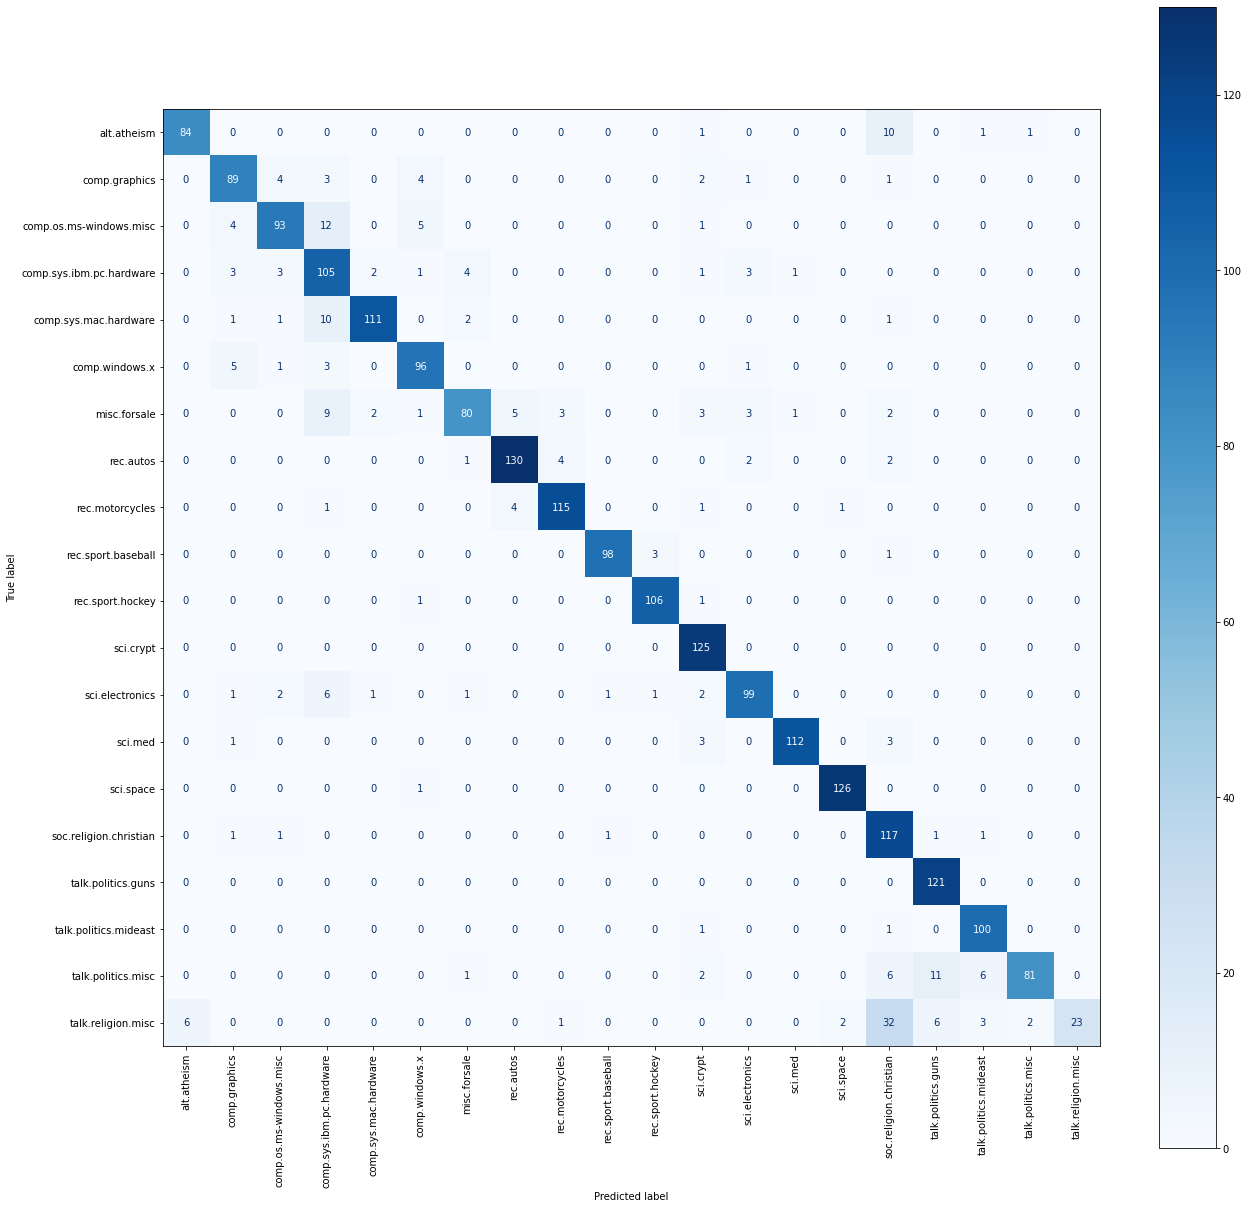

In [33]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21,21))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)

plt.xticks(rotation=90) 
disp

In [34]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names = model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.87      0.90        97
           comp.graphics       0.85      0.86      0.85       104
 comp.os.ms-windows.misc       0.89      0.81      0.85       115
comp.sys.ibm.pc.hardware       0.70      0.85      0.77       123
   comp.sys.mac.hardware       0.96      0.88      0.92       126
          comp.windows.x       0.88      0.91      0.89       106
            misc.forsale       0.90      0.73      0.81       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.93      0.94      0.94       122
      rec.sport.baseball       0.98      0.96      0.97       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.87      1.00      0.93       125
         sci.electronics       0.91      0.87      0.89       114
                 sci.med       0.98      0.94      0.96       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [37]:
my_sentence = "Should concealed carry be legal or illegal in NYC?"

# 1. Apply the text pipeline to your sentence
my_sentence = pipeline_function(my_sentence)
print(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
my_vectorized_sentence = vectorizer.transform([my_sentence])
# 3. Use the model to predict your new `X`. 
model.predict(my_vectorized_sentence)
# 4. Print the prediction
print(model.predict(my_vectorized_sentence))

conceal carri legal illeg nyc
['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [53]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df2 = pd.read_csv('data/dem-vs-rep-tweets.csv')




In [54]:
df2.shape

(86460, 3)

In [55]:
df2.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [56]:
df2.isnull().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [57]:
df2.duplicated().sum()

57

In [58]:
df2 = df2.drop_duplicates()

In [59]:
df2.shape

(86403, 4)

In [60]:
df2.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [62]:
#Using functions already made for text pre processing
df2['Tweet_clean'] = df2['Tweet'].apply(pipeline_function)

In [65]:
# get tweets and parties
X = df2['Tweet_clean'].values
y = df2['Party'].values


In [102]:
print(df['Tweet'][0])
print(df['Tweet_clean'][0])

Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [66]:
#Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_text = X_train
X_test_text = X_test

In [67]:
#initalize vectorizer
vectorizer.fit(X_train)

TfidfVectorizer()

In [68]:
#transform data with vectorizer

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [71]:
#Shape of training data and features
print(X_train.shape, type(X))

features = vectorizer.get_feature_names()
weights = vectorizer.idf_
print(len(features),len(weights))

df2_idf = pd.DataFrame.from_dict({'feature':features, 'idf' : weights})

df2_idf = df2_idf.sort_values(by='idf', ascending = False)

df2_idf

(69122, 101702) <class 'numpy.ndarray'>
101702 101702


C:\Users\conor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,idf
50851,httpstcomjulusrbwu,11.450496
54390,httpstcoolqacj0dt2,11.450496
54397,httpstcooltr8qvnz8,11.450496
54396,httpstcooltmasoma4,11.450496
54395,httpstcoolthxcfpo3,11.450496
...,...,...
100882,work,3.973740
95916,thank,3.581094
4622,amp,3.348818
96634,today,3.311055


In [111]:
#initalize empty model
model2 = MultinomialNB(alpha = 0.15)

In [112]:
# fit model
model2.fit(X_train, y_train)

MultinomialNB(alpha=0.15)

In [113]:
#make predictions
y_pred = model2.predict(X_test)
y_pred[0]

'Democrat'

In [114]:
#print accuracy
accuracy = model2.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816446


C:\Users\conor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


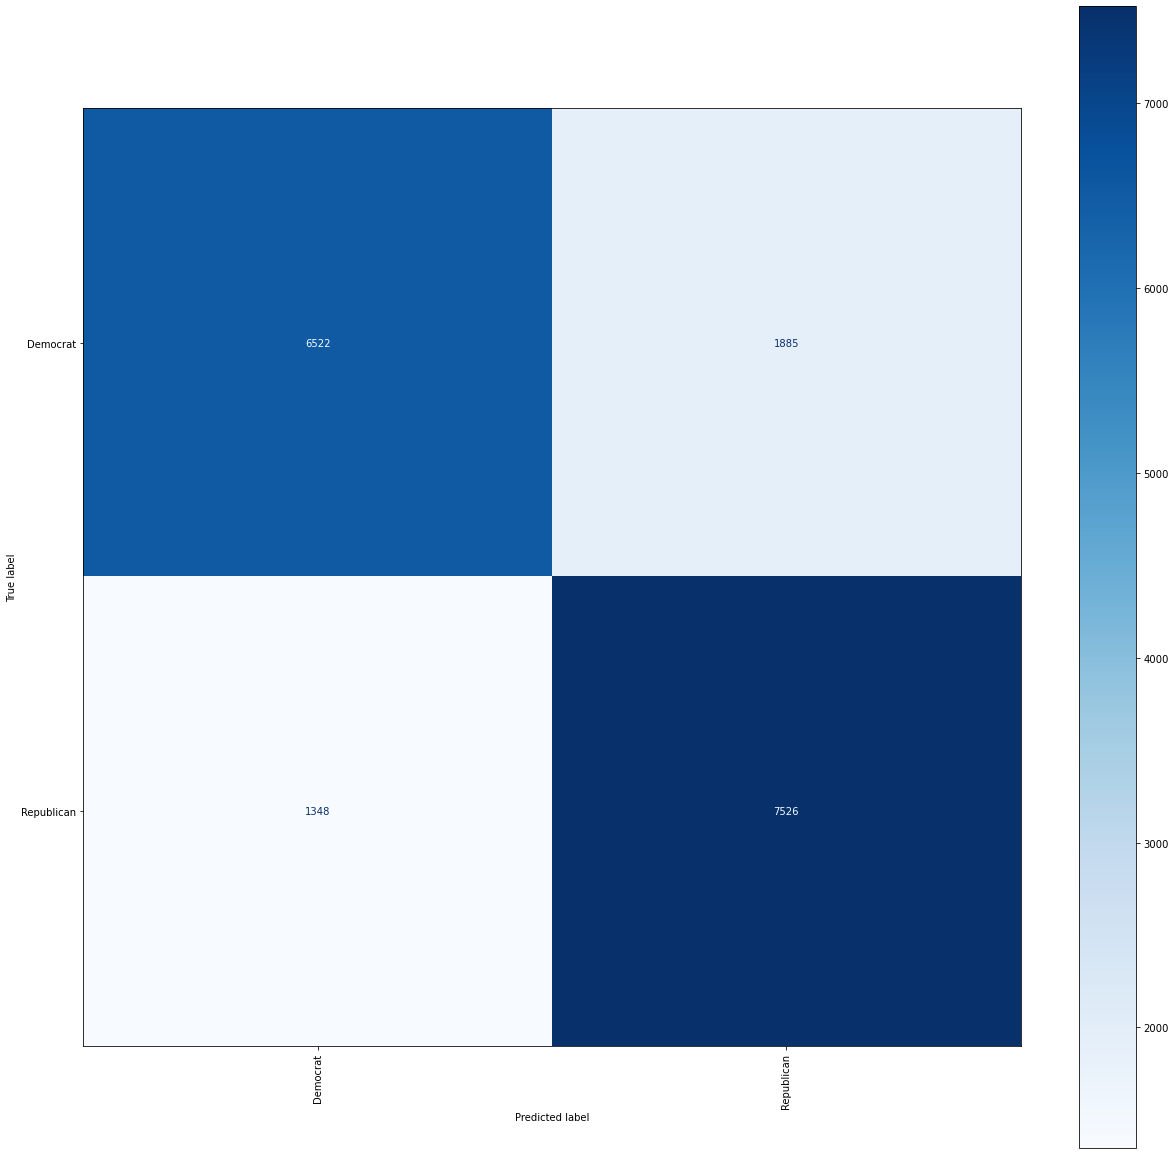

In [115]:
#plot data
fig, ax = plt.subplots(figsize=(21,21))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax = ax)

plt.xticks(rotation=90) 
disp

In [116]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Democrat       0.83      0.79      0.81      8407
  Republican       0.81      0.84      0.82      8874

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281

